<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_cur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [222]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [223]:
import warnings

warnings.filterwarnings('ignore')

input

In [224]:
df = pd.read_csv("pp_cur.csv")

exploratory

In [225]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        153 non-null    int64
 1   Problem Solving  153 non-null    int64
 2   Interaction      153 non-null    int64
 3   Impact           153 non-null    int64
 4   Accountability   153 non-null    int64
dtypes: int64(5)
memory usage: 6.1 KB


In [226]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,52,20,27,30,0
1,52,20,27,30,0
2,52,20,27,30,0
3,52,15,27,30,0
4,52,15,27,30,0


checks

In [227]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,70.019608,21.640523,41.326797,58.509804,6.307190
std,25.527454,12.488739,11.577445,25.084362,12.152691
min,40.000000,15.000000,27.000000,0.000000,0.000000
25%,52.000000,15.000000,36.000000,55.000000,0.000000
50%,52.000000,15.000000,36.000000,55.000000,0.000000
75%,94.000000,20.000000,52.000000,64.000000,0.000000
max,148.000000,87.000000,70.000000,168.000000,46.000000


In [228]:
X=df

Scaling

In [229]:
cols = X.columns

In [230]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [231]:
X = pd.DataFrame(X, columns=[cols])

In [232]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.111111,0.069444,0.0,0.178571,0.0
1,0.111111,0.069444,0.0,0.178571,0.0
2,0.111111,0.069444,0.0,0.178571,0.0
3,0.111111,0.000000,0.0,0.178571,0.0
4,0.111111,0.000000,0.0,0.178571,0.0


In [233]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.111111,0.069444,0.000000,0.178571,0.000000
1,0.111111,0.069444,0.000000,0.178571,0.000000
2,0.111111,0.069444,0.000000,0.178571,0.000000
3,0.111111,0.000000,0.000000,0.178571,0.000000
4,0.111111,0.000000,0.000000,0.178571,0.000000
...,...,...,...,...,...
148,0.324074,0.166667,0.209302,0.000000,1.000000
149,0.324074,0.166667,0.209302,0.000000,1.000000
150,0.583333,1.000000,0.000000,1.000000,0.456522
151,0.583333,1.000000,0.000000,1.000000,0.543478


K means

In [234]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [235]:
kmeans.cluster_centers_

array([[0.13453159, 0.04275599, 0.19402645, 0.31506769, 0.0326087 ],
       [0.56481481, 0.19117647, 0.61149111, 0.41468254, 0.34612106]])

inertia

In [236]:
kmeans.inertia_

21.433053476532717

Elbow

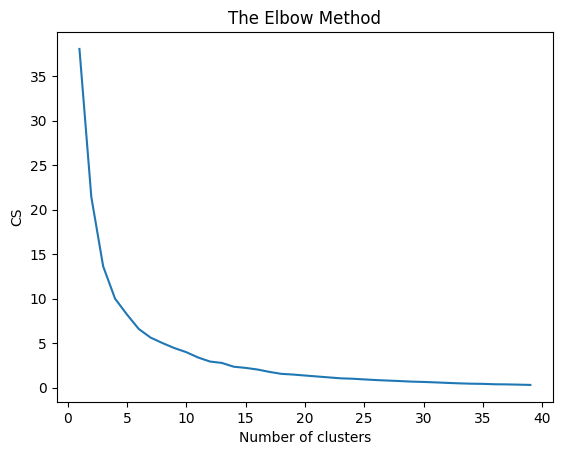

In [237]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

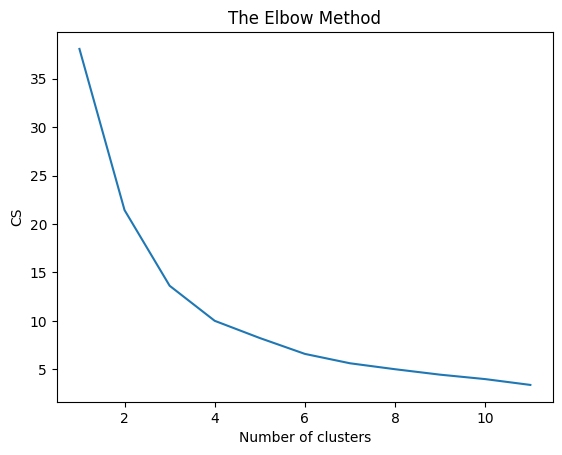

In [238]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [247]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [248]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_cur_l.csv')
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 2 0 0 0 0 1 0 1 1 0 0 0 2 2 2
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 2 2 2 0 2 2 2 0 2 2 0 1 1 0 1 0 1 2 1 0 2 0 2
 1 1 1 1 1]


In [249]:
Z=kmeans.cluster_centers_
Z

array([[1.33777006e-01, 4.07986111e-02, 1.93071705e-01, 3.07229663e-01,
        3.05311332e-16],
       [4.38180828e-01, 2.22222222e-01, 4.18604651e-01, 4.68487395e-01,
        6.17007673e-01],
       [6.42914654e-01, 1.14734300e-01, 7.91708797e-01, 3.41873706e-01,
        0.00000000e+00]])

In [250]:
import matplotlib

In [251]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=400)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])

[t-SNE] Computing 152 nearest neighbors...
[t-SNE] Indexed 153 samples in 0.001s...
[t-SNE] Computed neighbors for 153 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 153 / 153
[t-SNE] Mean sigma: 0.286454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.875648
[t-SNE] KL divergence after 2500 iterations: -1.040325


In [252]:
np.unique(labels)


array([0, 1, 2], dtype=int32)

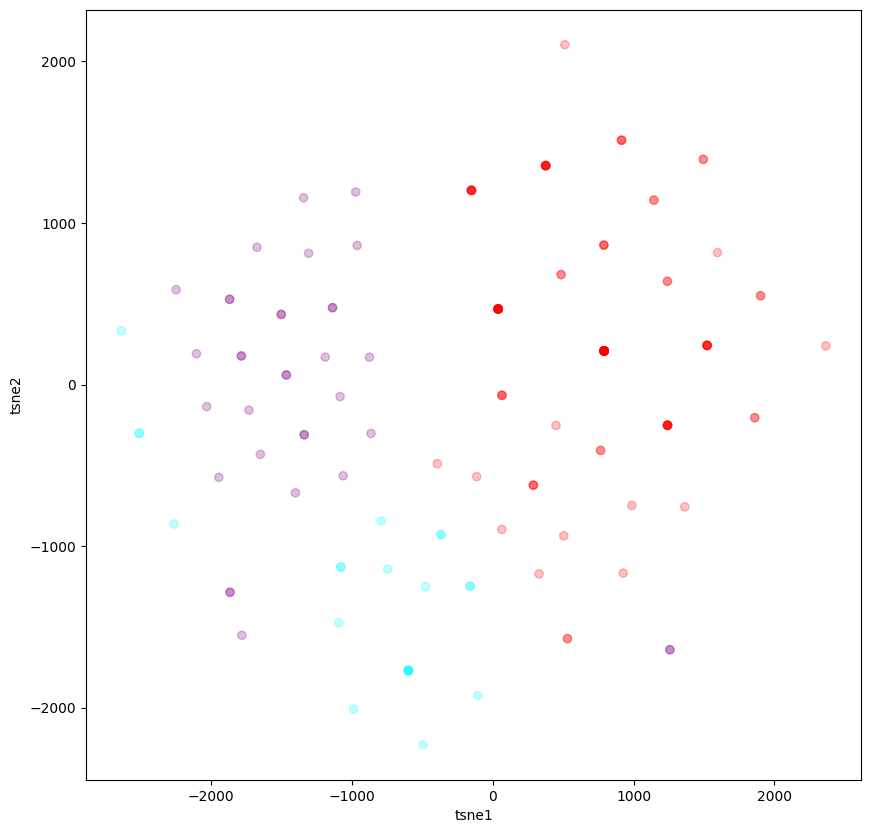

In [253]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [254]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_cur.csv')
Z2

array([[5.44479167e+01, 1.79375000e+01, 3.53020833e+01, 5.16145833e+01,
        1.40443213e-14],
       [8.73235294e+01, 3.10000000e+01, 4.50000000e+01, 7.87058824e+01,
        2.83823529e+01],
       [1.09434783e+02, 2.32608696e+01, 6.10434783e+01, 5.74347826e+01,
        0.00000000e+00]])